In [65]:
import pygyre as pg
import matplotlib.pyplot as plt
import numpy as np

In [66]:
s = pg.read_output('summary.h5')

In [67]:
s

E_norm,M_star,R_star,freq,l,n_pg,omega
float64,float64,float64,complex128,int32,int32,complex128
15.214554377534025,9.942049353490252e+32,35011629083.396904,(9.301886324004114+0j),2,-8,(0.5440199332164759+0j)
12.556467479857554,9.942049353490252e+32,35011629083.396904,(10.42235901750599+0j),2,-7,(0.6095506716772081+0j)
10.023585909199186,9.942049353490252e+32,35011629083.396904,(11.815731566871149+0j),2,-6,(0.6910419321428599+0j)
7.643851673646936,9.942049353490252e+32,35011629083.396904,(13.641485645676054+0j),2,-5,(0.7978209850601179+0j)
4.730790843215155,9.942049353490252e+32,35011629083.396904,(16.08432491594476+0j),2,-4,(0.9406902064610199+0j)
2.3608410904677353,9.942049353490252e+32,35011629083.396904,(19.274165384830095+0j),2,-3,(1.1272477216153456+0j)
1.1190082565217505,9.942049353490252e+32,35011629083.396904,(23.457375709621537+0j),2,-2,(1.3719023779134767+0j)
0.13636899175898312,9.942049353490252e+32,35011629083.396904,(29.388609225936843+0j),2,-1,(1.718790003610476+0j)
0.2554197594663015,9.942049353490252e+32,35011629083.396904,(32.264880743952865+0j),2,0,(1.8870084686228459+0j)


In [108]:
d = pg.read_output('detail.l2.n+4.h5')

In [109]:
c0 = 299792458
GNewton = 6.67408*10**(-11)

Rstar=s['R_star'][1] / 100
Mstar = s['M_star'][1] / 1000
M_r = d['M_r'] / 1000

rho_Dles = (d['rho'] * 10**3) * Rstar**2 * GNewton/ c0**2
M_Dles = Mstar * GNewton/ c0**2 / Rstar
Mr_Dles = M_r * GNewton/ c0**2 / Rstar

In [110]:
np.trapz(4.0*(np.pi)*(d['x'])*(rho_Dles)*Mr_Dles,d['x']) / (M_Dles**2)

1.0565731650345425

In [111]:
Rstar / (6.957*10**8)

0.5032575691159538

In [112]:
1/((rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))**(1/3)*0.5)

0.6724934368827783

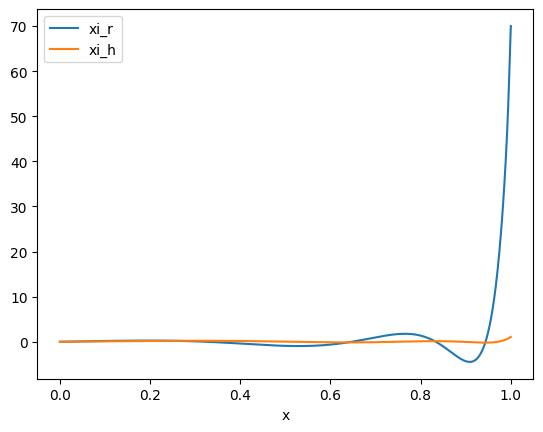

In [113]:

plt.figure()

plt.plot(d['x'], d['xi_r'].real, label='xi_r')
plt.plot(d['x'], d['xi_h'].real, label='xi_h')

plt.xlabel('x')

plt.legend()

/tmp/ipykernel_3464501/2715802805.py:11: RuntimeWarning: divide by zero encountered in divide
  d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)


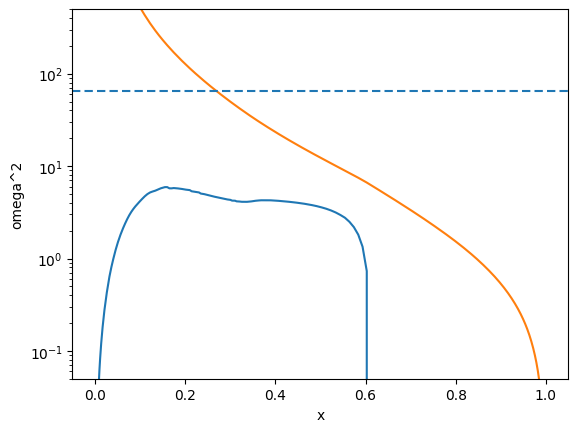

In [114]:
l = d.meta['l']
omega = d.meta['omega']

x = d['x']
V = d['V_2']*d['x']**2
As = d['As']
c_1 = d['c_1']
Gamma_1 = d['Gamma_1']

d['N2'] = d['As']/d['c_1']
d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)

# Plot the propagation diagram

plt.figure()

plt.plot(d['x'], d['N2'], label='N^2')
plt.plot(d['x'], d['Sl2'], label='S_l^2')

plt.axhline(omega.real**2, dashes=(4,2))

plt.xlabel('x')
plt.ylabel('omega^2')

plt.ylim(5e-2, 5e2)
plt.yscale('log')

In [115]:
D_overlap = np.trapz(rho_Dles *( d['x']**3 * d['xi_r'] + 3 * d['x']**2 * (d['x'] * d['xi_h'])),d['x']) / M_Dles

In [116]:
N_overlap= np.trapz(rho_Dles *( d['x']**2 * d['xi_r']**2 + 6 * (d['x'] * d['xi_h'])**2 ),d['x']) / M_Dles

In [117]:
D_overlap **2 / N_overlap

(1.2116600439062452e-05+0j)